# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize band)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define percent bands (from 0 to 10% increment by 0.5)

In [4]:
bands = range(0, 100, 5)
bands = [str(band) for band in bands]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for band in bands:
    print("{0}".format(band), end=" ")
    strategies[band] = strategy.Strategy(symbol, capital, start, end, sma_period=200, percent_band=int(band)/10)
    strategies[band].run()
    _, strategies[band].tlog, strategies[band].dbal = strategies[band].get_logs()
    strategies[band].stats = strategies[band].get_stats()

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'ending_balance',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'trades_per_year',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
annual_return_rate,6.45,6.38,6.46,6.17,6.19,6.51,6.52,6.47,6.40,6.48,6.40,5.95,5.58,5.44,4.94,5.18,4.94,5.08,5.09,4.85
ending_balance,3110248.38,2922993.45,3112679.54,2442446.25,2471421.89,3253938.36,3282517.36,3155591.98,2960009.41,3174966.49,2964048.06,2015243.68,1462204.28,1291240.34,835072.48,1029779.05,835955.42,943765.91,952106.53,772450.35
max_closed_out_drawdown,-51.57,-49.47,-49.46,-55.14,-54.31,-55.76,-57.79,-56.58,-53.61,-54.99,-49.72,-50.56,-50.56,-53.51,-54.49,-47.54,-47.54,-47.54,-50.32,-52.65
drawdown_annualized_return,-7.99,-7.75,-7.66,-8.93,-8.78,-8.57,-8.87,-8.74,-8.38,-8.49,-7.77,-8.49,-9.06,-9.84,-11.03,-9.18,-9.62,-9.36,-9.89,-10.85
drawdown_recovery,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.51,-3.42,-3.42,-3.59,-3.59,-3.59,-3.59,-3.59,-3.59,-3.59
best_month,27.01,27.01,27.01,27.02,27.02,27.01,27.00,27.01,27.01,27.02,27.01,27.02,27.02,22.42,22.41,22.41,22.41,22.41,22.42,22.42
worst_month,-26.88,-26.88,-26.89,-30.46,-27.07,-27.06,-27.06,-29.72,-29.72,-29.72,-29.72,-31.45,-31.46,-31.45,-31.47,-31.46,-31.47,-31.45,-31.46,-31.45
sharpe_ratio,0.58,0.57,0.58,0.55,0.56,0.58,0.58,0.57,0.56,0.57,0.56,0.52,0.49,0.48,0.44,0.46,0.44,0.45,0.45,0.43
sortino_ratio,0.59,0.58,0.59,0.57,0.57,0.59,0.59,0.58,0.57,0.58,0.58,0.52,0.49,0.48,0.44,0.46,0.44,0.45,0.45,0.44
monthly_std,3.33,3.37,3.37,3.39,3.38,3.37,3.36,3.43,3.41,3.43,3.44,3.55,3.56,3.55,3.59,3.53,3.57,3.60,3.61,3.66


Bar graphs

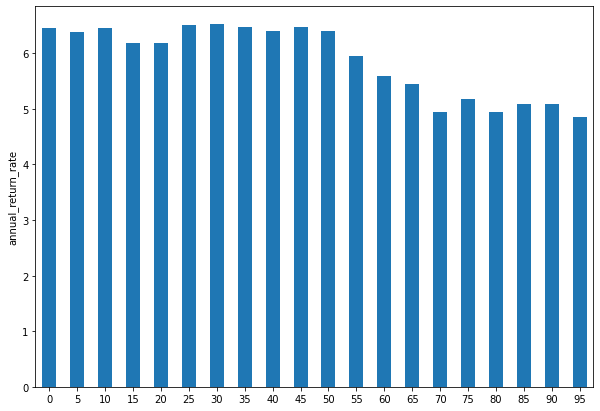

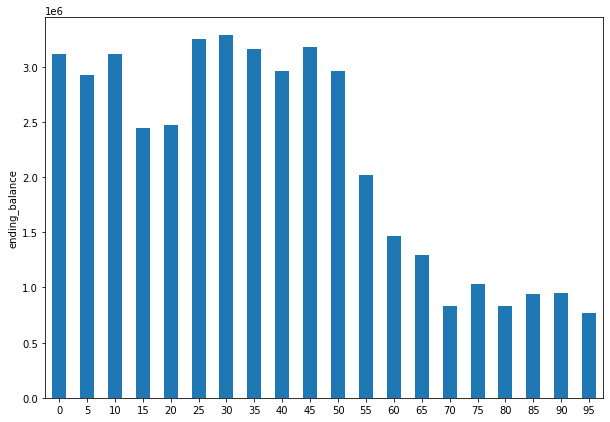

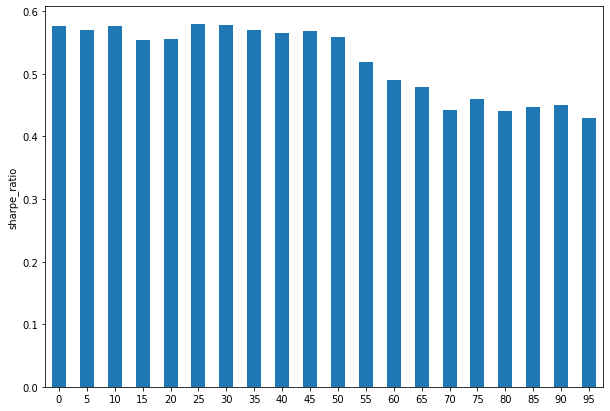

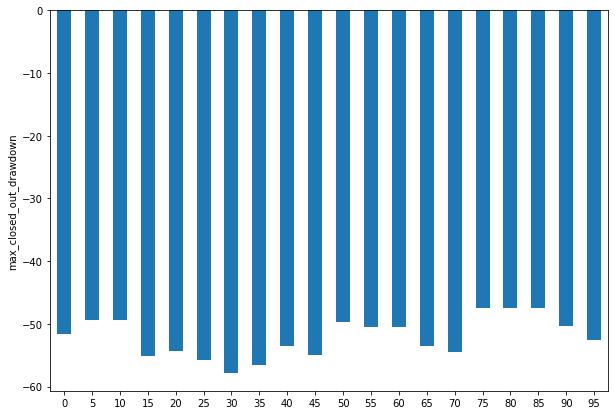

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[bands[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1928-10-16 00:00:00 BUY  460 ^GSPC @ 21.72
2020-07-23 00:00:00 SELL 460 ^GSPC @ 3275.96


Equity curve

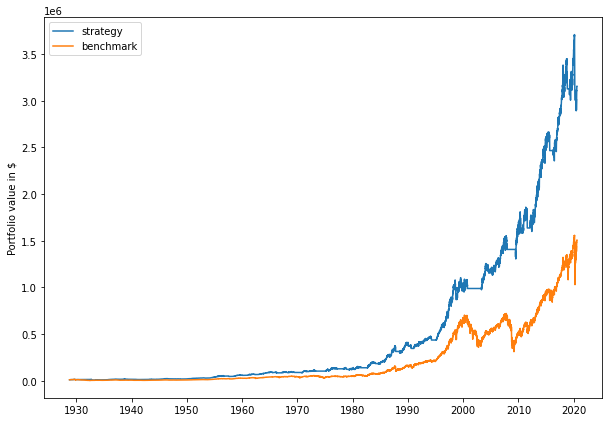

In [9]:
pf.plot_equity_curve(strategies['35'].dbal, benchmark=benchmark.dbal)